# How to Access GES DISC Data Using Python

<p></p>

<div style="background:#eeeeee; border:1px solid #cccccc;padding:5px 10px;">Please, be very judicious when working on long data time series residing on a remote data server.<br />
It is very likely that attempts to apply similar approaches on remote data, such as hourly data, for more than a year of data at a time, will result in a heavy load on the remote data server. This may lead to negative consequences, ranging from very slow performance that will be experienced by hundreds of other users, up to denial of service.</div>

### Overview

There are multiple ways to work with GES DISC data resources using Python. For example, the data can accessed using [techniques that rely on a native Python code](https://cmr.earthdata.nasa.gov/search/site/docs/search/api.html). 

Still, there are several third-party libraries that can further simplify the access. In the sections below, we describe three techniques that make use of Requests, Pydap, and Xarray libraries.

### Prerequisites

This notebook was written using Python 3.8, and requires these libraries and files:
- A <code>.netrc</code> file containing your [Earthdata Login credentials](https://wiki.earthdata.nasa.gov/display/EL/How+To+Register+For+an+EarthData+Login+Profile), including <code>.dodsrc</code> files. 

- [requests](https://docs.python-requests.org/en/latest/) (version 2.22.0 or later)
- [pydap](https://www.pydap.org/en/latest/) (we recommend using version 3.2.1)
- [xarray](https://docs.xarray.dev/en/stable/)

### Python Using 'Requests'

'Requests' is a popular Python library that simplifies Python access to Internet-based resources. In the following code, we demonstrate how to use 'Requests' to access GES DISC data using cookies created by a host operating system.

Download GES DISC data using the following Python3 code:

In [1]:
import requests
import os
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import earthpy.plot as ep
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from tqdm import tqdm
from rasterio.plot import plotting_extent
import csv
import io
from contextlib import redirect_stdout
from shapely.geometry import Point


data_dir = os.path.join(os.path.expanduser('~'), 'GitHub', 'Chile-Glaciers')

/tmp/ipykernel_26540/3890776760.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
file_list = os.path.join(data_dir, 'subset_GLDAS_CLSM025_DA1_D_2.2_20230503_215908_.txt')
f = open(file_list).readlines()[1:]

In [3]:
fixed_files = [i.replace("%2F", "/").replace('\n', '').replace('%2C', ',') for i in f]

In [4]:
def file_name_creator(url):
    return os.path.join('data', 'grace_files', url.split('&')[0].split('/')[-1])

def file_creation(url):
    result = requests.get(url)
    FILENAME = file_name_creator(url)
    try:
        result.raise_for_status()
        f = open(FILENAME,'wb')
        f.write(result.content)
        f.close()
        return(FILENAME)
    except:
        print('requests.get() returned an error code '+str(result.status_code))

In [5]:
countries = gpd.read_file(os.path.join('data', 'ne_50m_admin_0_countries', 'ne_50m_admin_0_countries.shp'))

chile = countries[countries['SOVEREIGNT']=='Chile'].clip([-75,-60,-65,-15])


<Axes: >

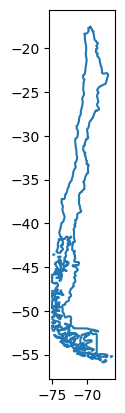

In [6]:
fig, ax = plt.subplots()
chile.boundary.plot(ax=ax)
# gdf.plot(ax=ax, color='red')


In [7]:
# files = []
# for urls in tqdm(fixed_files):
#     files.append(file_creation(urls))

In [8]:
files = []
for urls in fixed_files:
    files.append(file_name_creator(urls))

In [9]:
# variables = ['EvapSnow_tavg','GWS_tavg','Qsm_tavg','SnowDepth_tavg','SnowT_tavg','SWE_tavg']
# ext = plotting_extent(ds[0], ds.rio.transform())

In [10]:
# Open all bands in a loop
all_bands = []
for i, aband in enumerate(files):
    all_bands.append(rxr.open_rasterio(aband, masked=True).squeeze())
    # Assign a band number to the new xarray object
    all_bands[i]["band"]=i+1
    all_bands[i]["date"] = aband.split('.')[1][1:]


In [11]:
# OPTIONAL: Turn list of bands into a single xarray object    
chile_stack = xr.concat(all_bands, dim="band") 
chile_stack

<xarray.DataArray 'SWE_tavg' (band: 181, y: 600, x: 1440)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    time         (band) object 2022-01-01 00:00:00 ... 2022-06-30 00:00:00
  * x            (x) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * y            (y) float64 89.88 89.62 89.38 89.12 ... -59.38 -59.62 -59.88
    spatial_ref  int64 0
  * band         (band) int64 1 2 3 4 5 6 7 8 ... 175 176 177 178 179 180 181
    date         (band) <U8 '20220101' '20220102' ... '20220629' '20220630'
Attributes: (12/36)
    AREA_OR_POINT:           Area
    lat#axis:                Y
    lat#long_name:           latitude
    lat#standard_name:       latitude
    lat#units:               degrees_north
    lon#axis:                X
    ...                      ...
    standard_name:           surface_snow_amount
    units:                   kg m-2
    vmax:                    2180.7617
    vmin:                    0
    scale_factor:            1.0
    add_offset:              0.0

In [12]:
data_dir
chile_path = os.path.join(data_dir, 'data', 'SWE_stack.tif')
chile_stack.rio.to_raster(chile_path)

In [13]:
chile_data = rxr.open_rasterio(chile_path, band_as_variable='band')

In [14]:
def extract_points(raster_file, points):
    # Open raster
    raster = rio.open(raster_file)
    values = []
    # Create a bounding box for the raster and clip the points to that
    points_clip = points.clip(box(*raster.bounds))
    point_num = len(points_clip)
    array = raster.read()
    # Loop through points, get the value of the raster at each xy
    for point in points_clip['geometry']:
        x, y = point.xy[0][0], point.xy[1][0]
        row, col = raster.index(x,y)
        attrs = []
        band_nums = array.shape[0]
        for z in range(band_nums):
            attrs.append(array[z, row,col])
        values.append([attrs, point])
    # Close raster
    raster.close()
    return(values)

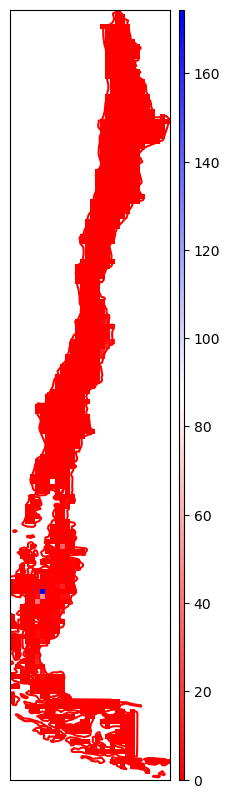

In [15]:
point = Point(-74, -50)

gdf = gpd.GeoDataFrame(
    geometry=[point],
    crs="EPSG:4269",
)

ds = rxr.open_rasterio(files[120], mask_and_scale=True).rio.clip(chile.geometry)
ext = plotting_extent(ds[0], ds.rio.transform())

fig, ax= plt.subplots(figsize=(10,10))
chile.boundary.plot(ax=ax, color='red')
# gdf.plot(ax=ax, color='red')
# ax.imshow(ds['SnowDepth_tavg'].squeeze(), cmap='Blues')
ep.plot_bands(ds.squeeze(), ax=ax, cmap='bwr_r', extent=ext)
plt.show()